In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
X, y = make_classification(
    n_samples= 1000,
    n_features= 10,
    n_informative=4,
    n_redundant=6,
    n_repeated=0,
    n_classes=2,
    random_state=42
)

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Logistic Regression Model

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       127
           1       0.66      0.69      0.68       123

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.68      0.68      0.68       250



In [28]:
probabilities = model.predict_proba(X_test)[:,1]
custom_pred = (probabilities > 0.4).astype(int)

report = classification_report(y_test, y_pred=custom_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.57      0.65       122
           1       0.67      0.82      0.74       128

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.69       250
weighted avg       0.71      0.70      0.70       250



In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, probabilities)
fpr[:5], tpr[:5], thresholds[:5]

(array([0.        , 0.        , 0.        , 0.00819672, 0.00819672]),
 array([0.       , 0.0078125, 0.265625 , 0.265625 , 0.2890625]),
 array([       inf, 0.97928246, 0.80890214, 0.80840719, 0.80207033]))

In [36]:
desired_recall = 0.9

closest_index = np.argmin(abs(tpr - desired_recall))
closest_index

np.int64(76)

In [37]:
thresholds[closest_index]

np.float64(0.26349585272229664)

In [39]:
probabilities = model.predict_proba(X_test)[:,1]
custom_pred = (probabilities > 0.26349585272229664).astype(int)

report = classification_report(y_test, y_pred=custom_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.30      0.42       122
           1       0.57      0.90      0.70       128

    accuracy                           0.60       250
   macro avg       0.65      0.60      0.56       250
weighted avg       0.65      0.60      0.56       250



In [41]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

np.float64(0.764856557377049)

In [67]:
def plotChart(fpr, tpr, area, fpr2 = [False], tpr2 = None, area2 = None):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area=%0.2f)' % area)
    plt.plot(fpr2, tpr2, color='green', lw=2, label='ROC curve (area=%0.2f)' % area2) if False not in fpr2 else None
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0]),
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend (loc= "lower right")
    plt.show()

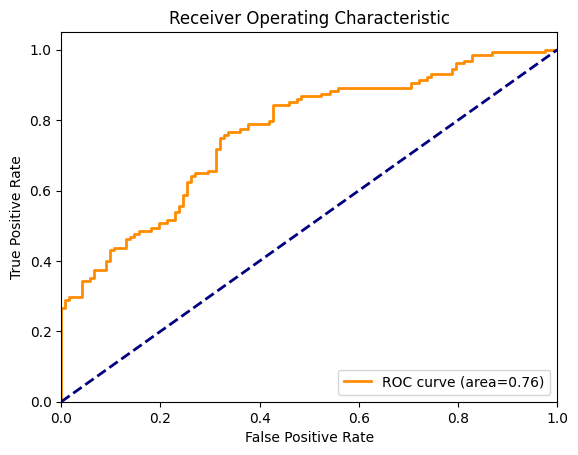

In [68]:
plotChart(fpr, tpr, area)

## XGBoost Time

In [44]:
from xgboost import XGBClassifier

model = XGBClassifier() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       122
           1       0.93      0.89      0.91       128

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [ ]:
probabilities_xgb = model.predict_proba(X_test)[:,1]
custom_pred_xgb = (probabilities_xgb > 0.4).astype(int)

report = classification_report(y_test, y_pred=custom_pred_xgb)
print(report)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, probabilities_xgb)

desired_recall = 0.95

closest_index_xgb = np.argmin(abs(tpr_xgb - desired_recall))
print(closest_index_xgb)
print(thresholds_xgb[closest_index_xgb])

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       122
           1       0.91      0.90      0.90       128

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

32
0.01948605


In [72]:

probabilities_xgb = model.predict_proba(X_test)[:,1]
custom_pred_xgb = (probabilities_xgb > 0.26349585272229664).astype(int)

report = classification_report(y_test, y_pred=custom_pred_xgb)
print(report)

area_xgb = auc(fpr_xgb, tpr_xgb)
print(area_xgb)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       122
           1       0.89      0.92      0.91       128

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

0.946016905737705


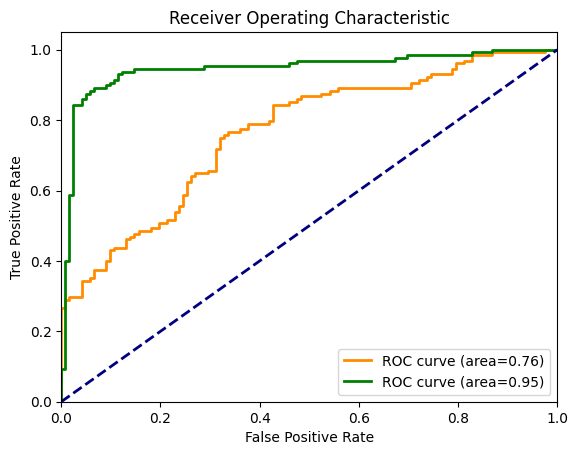

In [74]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area=%0.2f)' % area)
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='ROC curve (area=%0.2f)' % area_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0]),
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend (loc= "lower right")
plt.show()

In [77]:
desired_recall = 0.94

closest_index_xgb = np.argmin(abs(tpr_xgb - desired_recall))
print(closest_index_xgb)

28


In [78]:
thresholds_xgb[closest_index_xgb], fpr_xgb[closest_index_xgb]

(np.float32(0.22574013), np.float64(0.12295081967213115))